In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:>

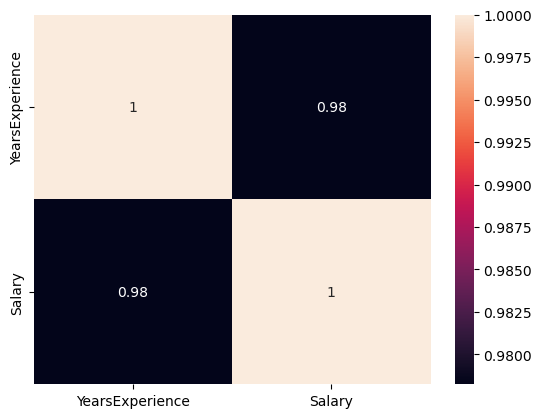

In [5]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:xlabel='YearsExperience', ylabel='Count'>

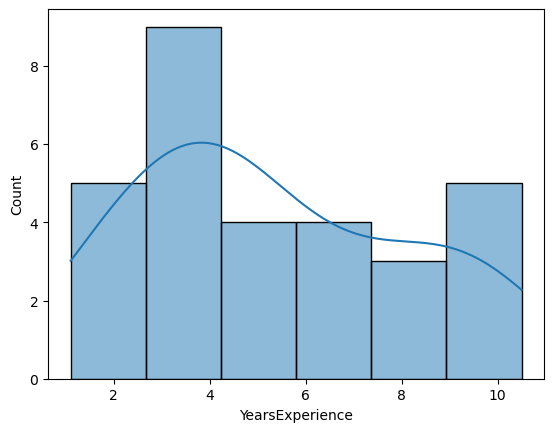

In [6]:
sns.histplot(data = df['YearsExperience'],kde=True)

In [7]:
df['YearsExperience'].skew()

0.37956024064804106

In [8]:
#Log transform
df['log_YOE'] = np.log(df['YearsExperience'])
df.head()

,YearsExperience,Salary,log_YOE
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


In [9]:
df['log_YOE'].skew()

-0.6005648582626513

<AxesSubplot:xlabel='log_YOE', ylabel='Count'>

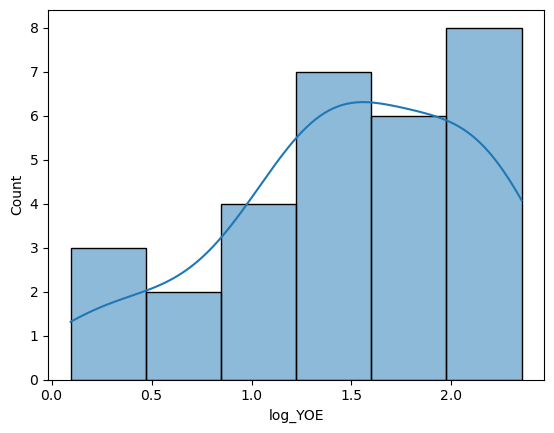

In [11]:
sns.histplot(data = df['log_YOE'],kde=True)

In [12]:
#sqrt Tranformation
df['sqrt_YOE'] = np.sqrt(df['YearsExperience'])
df.head()

,YearsExperience,Salary,log_YOE,sqrt_YOE
0,1.1,39343.0,0.095310,1.048809
1,1.3,46205.0,0.262364,1.140175
2,1.5,37731.0,0.405465,1.224745
3,2.0,43525.0,0.693147,1.414214
4,2.2,39891.0,0.788457,1.483240


In [14]:
df['sqrt_YOE'].skeww()

-0.04919608394250605

<AxesSubplot:xlabel='sqrt_YOE', ylabel='Count'>

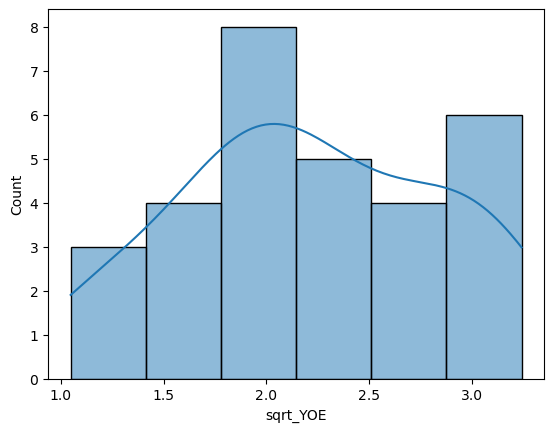

In [13]:
sns.histplot(data = df['sqrt_YOE'],kde=True)

In [17]:
import statsmodels.formula.api as smf

In [18]:
#model1
model = smf.ols('Salary~YearsExperience',data = df).fit()

In [19]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [20]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [21]:
#model2
model2 = smf.ols('Salary~log_YOE',data = df).fit()

In [22]:
model2.params

Intercept    14927.97177
log_YOE      40581.98796
dtype: float64

In [23]:
model2.rsquared,model2.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

In [24]:
#model3
model3= smf.ols('Salary~sqrt_YOE',data = df).fit()

In [25]:
model3.params

Intercept   -16055.769117
sqrt_YOE     41500.680583
dtype: float64

In [26]:
model3.rsquared,model3.rsquared_adj

(0.9310009544993526, 0.9285367028743294)

# As we can see Simple linear regression is performing Best with original data